In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,recall_score,precision_score, classification_report

In [2]:
# Last inn dataene
cancer = load_breast_cancer(as_frame=True)

In [3]:
X_data = cancer["data"]
X_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y_data = cancer["target"]
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

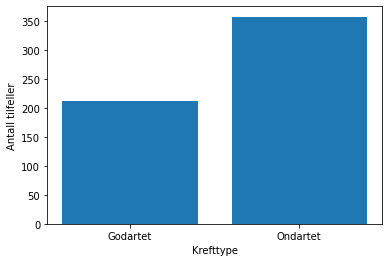

In [5]:
plt.bar(x=np.unique(y_data, return_counts=True)[0], height= np.unique(y_data, return_counts=True)[1])
plt.xticks([0,1],["Godartet", "Ondartet"])
plt.xlabel("Krefttype")
plt.ylabel("Antall tilfeller")
plt.show()

In [6]:
ondartet = (np.unique(y_data, return_counts=True)[1][0]/np.unique(y_data, return_counts=True)[1][1]).round(2)
print("{} % ondartet og {} % godartet".format(ondartet*100, 100*(1-ondartet).round(2)))

59.0 % ondartet og 41.0 % godartet


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,random_state=42)

In [8]:
logreg = LogisticRegression(solver='lbfgs',max_iter=5000)
logreg.fit(X_train, y_train)
y_test_hat = logreg.predict_proba(X_test)[:,1]

In [9]:
print("Nøyaktighet = ", round(accuracy_score(y_test,(y_test_hat>0.5)*1),2))
print("Sensitivitet = ",recall_score(y_test,(y_test_hat>0.5)*1,pos_label=1).round(2))
print("Spesifisitet = ",recall_score(y_test,(y_test_hat>0.5)*1,pos_label=0).round(2))
print("Presisjon = ",precision_score(y_test,(y_test_hat>0.5)*1).round(2))
print("F1-score = ",f1_score(y_test,(y_test_hat>0.5)*1).round(2))

Nøyaktighet =  0.97
Sensitivitet =  0.98
Spesifisitet =  0.94
Presisjon =  0.97
F1-score =  0.97


In [10]:
print(classification_report((y_test_hat>0.5)*1,y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.98      0.97      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



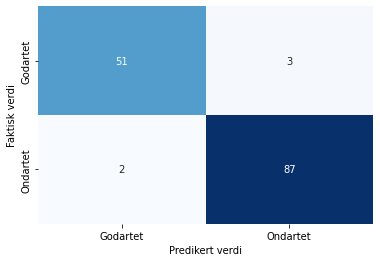

In [11]:
sns.heatmap(confusion_matrix(y_test,(y_test_hat>0.5)*1), annot=True, cbar=False,cmap="Blues")
plt.ylabel("Faktisk verdi")
plt.xlabel("Predikert verdi")
plt.xticks([0.5,1.5],["Godartet", "Ondartet"])
plt.yticks([0.5,1.5],["Godartet", "Ondartet"])
plt.show()

In [12]:
import shap

In [13]:
shap.initjs()

In [14]:
explainer = shap.LinearExplainer(logreg, X_train)

In [15]:
shap_values = explainer.shap_values(X_test)

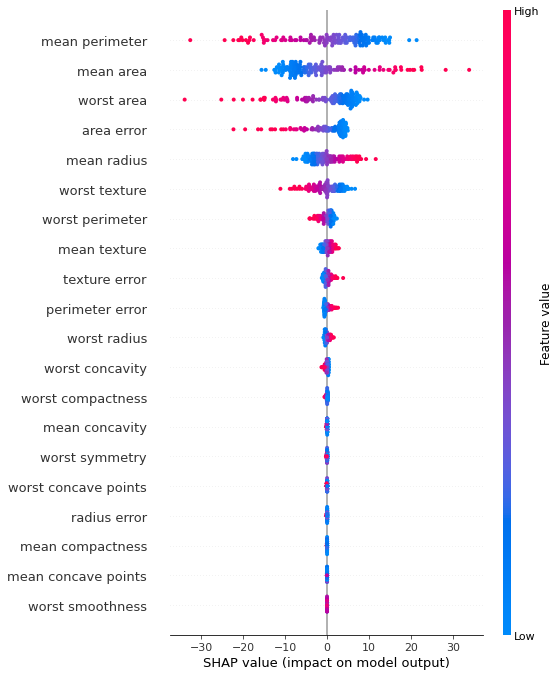

In [16]:
shap.summary_plot(shap_values, X_test)

In [17]:
explainer.expected_value

-0.8732930818218456

In [18]:
y_test = y_test.reset_index(drop=True)

In [19]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.26710,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.26870,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.37910,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.24030,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.17970,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,...,16.34,18.24,109.40,803.6,0.1277,0.3089,0.26040,0.13970,0.3151,0.08473
199,14.45,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,...,18.33,30.12,117.90,1044.0,0.1552,0.4056,0.49670,0.18380,0.4753,0.10130
411,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
18,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,27.32,30.88,186.80,2398.0,0.1512,0.3150,0.53720,0.23880,0.2768,0.07615


Ground Truth:  1


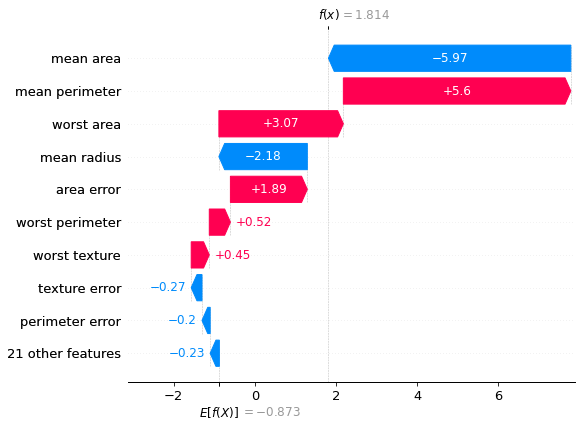

Ground Truth:  0


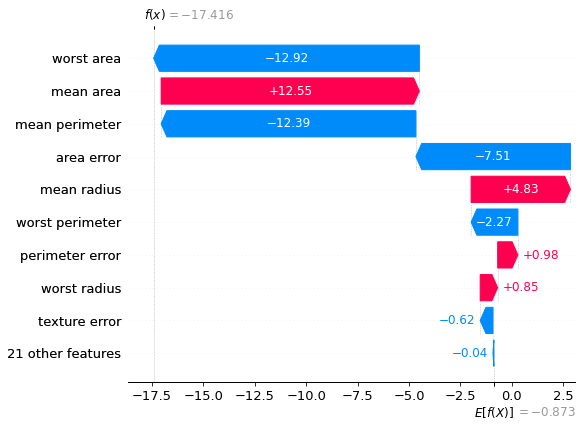

Ground Truth:  0


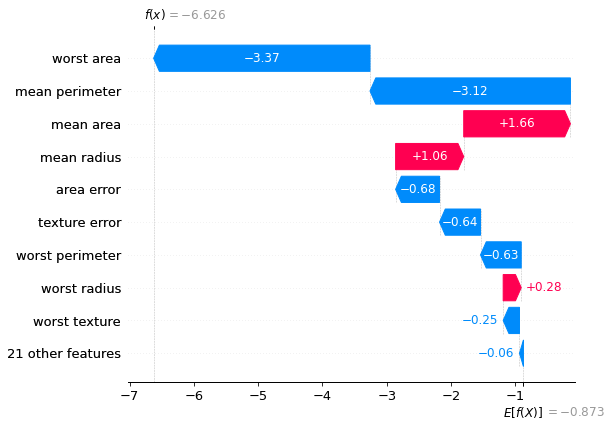

In [20]:
for i in range(3):
    print("Ground Truth: ", y_test[i])
    #print("Input data: ", X_test.iloc[i])
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[i], feature_names=X_test.columns)
    plt.show()

Ground Truth: 1


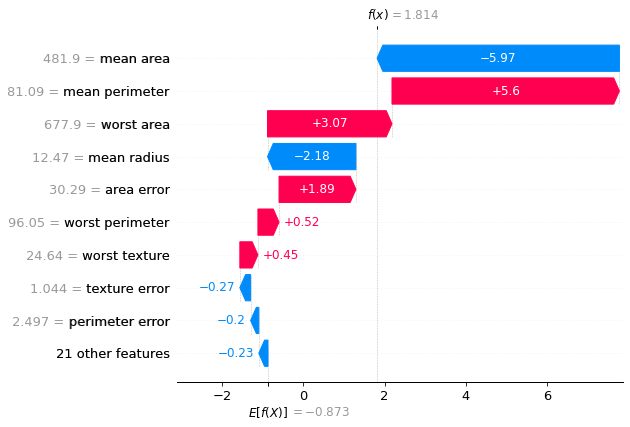

In [21]:
import shap
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import numpy as np


patient_selector = widgets.IntSlider(
    value=0,
    min=0,
    max=len(X_test) - 1,
    step=1,
    description='Patient:',
    continuous_update=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='95%')
)

feature_widgets = {}

def create_feature_sliders(patient_idx):
    """Create sliders for each feature (numeric only)."""
    feature_widgets.clear()
    sliders = []
    for col in X_test.columns:
        val = X_test.iloc[patient_idx][col]
        slider = widgets.FloatSlider(
            value=float(val),
            min=float(X_test[col].min()),
            max=float(X_test[col].max()),
            step=(float(X_test[col].max()) - float(X_test[col].min())) / 100,
            description=str(col),
            continuous_update=False,
            layout=widgets.Layout(width='95%')
        )
        feature_widgets[col] = slider
        sliders.append(slider)
    return sliders


def update_plot(change=None):
    """Recompute and redraw SHAP plot."""
    x_modified = pd.DataFrame({col: [slider.value] for col, slider in feature_widgets.items()})
    shap_values_modified = explainer(x_modified)

    clear_output(wait=True)
    display(ui)
    print(f"Ground Truth: {y_test.iloc[patient_selector.value]}")

    shap.plots.waterfall(shap_values_modified[0])
    plt.show()


def on_patient_change(change):
    """When patient changes, rebuild sliders and connect callbacks."""
    sliders = create_feature_sliders(change['new'])


    n = len(sliders)
    col_size = int(np.ceil(n / 3))
    col1 = widgets.VBox(sliders[:col_size])
    col2 = widgets.VBox(sliders[col_size:2*col_size])
    col3 = widgets.VBox(sliders[2*col_size:])

    sliders_grid = widgets.HBox([col1, col2, col3])
    for slider in feature_widgets.values():
        slider.observe(update_plot, names='value')

    right_box.children = [sliders_grid]
    update_plot()



right_box = widgets.VBox([])
ui = widgets.VBox([
    patient_selector,
    right_box
])

patient_selector.observe(on_patient_change, names='value')


display(ui)
on_patient_change({'new': 0})


Ground Truth: 1
Model Prediction (prob=1): 0.0158
Predicted Class: 0

Modified Input:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,6.981,18.6,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875


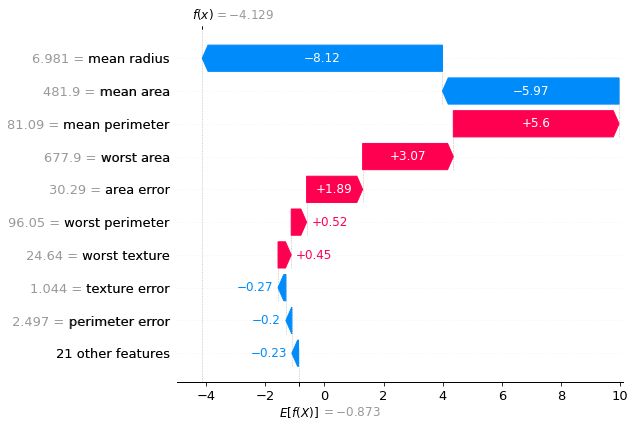

In [22]:
import shap
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import numpy as np

# --- Assume you already have ---
# logreg = trained logistic regression model
# explainer = shap.Explainer(logreg, X_train)
# X_test, y_test are pandas DataFrames/Series

# --- Step 1: Patient selector ---
patient_selector = widgets.IntSlider(
    value=0,
    min=0,
    max=len(X_test) - 1,
    step=1,
    description='Patient:',
    continuous_update=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='95%')
)

feature_widgets = {}

def create_feature_sliders(patient_idx):
    """Create sliders for each numeric feature."""
    feature_widgets.clear()
    sliders = []
    for col in X_test.columns:
        val = X_test.iloc[patient_idx][col]
        slider = widgets.FloatSlider(
            value=float(val),
            min=float(X_test[col].min()),
            max=float(X_test[col].max()),
            step=(float(X_test[col].max()) - float(X_test[col].min())) / 100,
            description=str(col),
            continuous_update=False,
            layout=widgets.Layout(width='95%')
        )
        feature_widgets[col] = slider
        sliders.append(slider)
    return sliders


def update_plot(change=None):
    """Recompute SHAP values, model prediction, and redraw everything."""
    # Get modified input
    x_modified = pd.DataFrame({col: [slider.value] for col, slider in feature_widgets.items()})
    
    # Model prediction
    y_pred_prob = logreg.predict_proba(x_modified)[0][1]
    y_pred_class = logreg.predict(x_modified)[0]
    
    # SHAP values
    shap_values_modified = explainer(x_modified)

    clear_output(wait=True)
    display(ui)

    print(f"Ground Truth: {y_test.iloc[patient_selector.value]}")
    print(f"Model Prediction (prob=1): {y_pred_prob:.4f}")
    print(f"Predicted Class: {y_pred_class}")
    print("\nModified Input:")
    display(x_modified)

    shap.plots.waterfall(shap_values_modified[0])
    plt.show()


def on_patient_change(change):
    """When patient changes, rebuild sliders and re-render."""
    sliders = create_feature_sliders(change['new'])

    # Split sliders into 3 columns for nice layout
    n = len(sliders)
    col_size = int(np.ceil(n / 3))
    col1 = widgets.VBox(sliders[:col_size])
    col2 = widgets.VBox(sliders[col_size:2*col_size])
    col3 = widgets.VBox(sliders[2*col_size:])

    sliders_grid = widgets.HBox([col1, col2, col3])
    for slider in feature_widgets.values():
        slider.observe(update_plot, names='value')

    right_box.children = [sliders_grid]
    update_plot()


# --- Layout containers ---
right_box = widgets.VBox([])
ui = widgets.VBox([
    patient_selector,
    right_box
])

# --- Bind patient change event ---
patient_selector.observe(on_patient_change, names='value')

# --- Display ---
display(ui)
on_patient_change({'new': 0})
